# Prédiction du Churn des Clients Télécom

## Aperçu du projet
Ce projet vise à prédire si un client d’une compagnie télécom va résilier son abonnement (churn) ou non, à partir de ses données d’utilisation : durée des appels, nombre de messages vocaux, appels internationaux, appels au service client, etc.


## Courte description
À partir du dataset `bigml_59.csv`, nous allons construire plusieurs modèles de classification (régression logistique, arbre de décision, random forest) afin de comparer leurs performances.  
L’objectif final est de fournir aux décideurs des **recommandations concrètes pour réduire le churn**, améliorer la fidélisation et augmenter la rentabilité.

## Compréhension du problème

### Contexte métier
Les entreprises de télécommunication font face à un défi majeur : **la perte de clients (churn)**.  
Conserver un client existant coûte souvent beaucoup moins cher que d’en acquérir un nouveau.  
Dans ce contexte, anticiper quels clients risquent de résilier leur contrat permet à l’entreprise de mettre en place des stratégies de **fidélisation ciblées** (offres promotionnelles, services personnalisés, meilleure assistance, etc.).

### Parties prenantes
- **Direction Marketing** : souhaite comprendre les profils de clients à risque afin de mettre en place des campagnes ciblées.  
- **Service Client** : veut savoir quels clients sont plus susceptibles d’appeler pour se plaindre avant de résilier.  
- **Direction Générale** : s’intéresse aux pertes financières liées au churn et aux stratégies pour améliorer la rétention.  

### Objectif du projet
Construire un modèle de **classification prédictive** capable de prédire si un client va **résilier son contrat (churn = True)** ou **rester (churn = False)**.  

Le modèle permettra :  
1. D’identifier les **facteurs clés** qui influencent la résiliation.  
2. De détecter les clients à risque avant qu’ils ne partent.  
3. De proposer des **recommandations stratégiques** pour améliorer la satisfaction et la fidélité client.  

### Problème métier
- Question clé : *« Pouvons-nous prédire la résiliation d’un client télécom à partir de ses données d’utilisation et d’interaction avec l’entreprise ? »*  
- Valeur ajoutée : une meilleure fidélisation entraîne une **augmentation directe des revenus** et une réduction des coûts liés à l’acquisition de nouveaux clients.


## Compréhension des données

### Source des données
Le dataset utilisé est `bigml_59.csv`, un ensemble de données classiques sur le **Customer Churn dans le secteur des télécommunications**.  
Il contient des informations détaillées sur l’utilisation du service par les clients, leurs interactions avec l’entreprise et leur statut de fidélité (churn ou non).

### Description du dataset
- **Nombre d’observations** : 3 333 clients  
- **Nombre de variables** : 21  
- **Variable cible** :  
  - `churn` : indique si le client a résilié son contrat (`True`) ou non (`False`).

### Variables explicatives principales
- **Caractéristiques clients**
  - `state` : État du client  
  - `account length` : Durée de l’abonnement (en jours)  
  - `area code` : Code régional du client  
  - `phone number` : Numéro de téléphone (identifiant, pas utile pour la modélisation)

- **Plans d’abonnement**
  - `international plan` : Oui / Non → indique si le client a souscrit un plan international  
  - `voice mail plan` : Oui / Non → indique si le client a souscrit un plan messagerie vocale  
  - `number vmail messages` : Nombre de messages vocaux stockés  

- **Utilisation des services**
  - `total day minutes`, `total day calls`, `total day charge`  
  - `total eve minutes`, `total eve calls`, `total eve charge`  
  - `total night minutes`, `total night calls`, `total night charge`  
  - `total intl minutes`, `total intl calls`, `total intl charge`  

- **Service client**
  - `customer service calls` : Nombre d’appels passés au service client  

### Observations initiales
- Le dataset mélange des variables **numériques** (minutes, appels, charges) et **catégorielles** (plans, état, churn).  
- La variable `phone number` est uniquement un identifiant → elle sera supprimée dans la préparation des données.  
- Certaines variables comme `area code` ou `state` pourraient avoir un effet limité sur le churn.  
- La variable `churn` est déséquilibrée (moins de clients churn que non churn), ce qui devra être pris en compte dans la modélisation.  

### Objectif de l’exploration
- Comprendre la répartition de la variable cible (`churn`).  
- Identifier les corrélations entre les comportements (utilisation des minutes, appels au service client, plans) et le churn.  
- Préparer les données pour l’entraînement des modèles de classification.

## Modèle de prédiction du churn

L’objectif principal est de créer un **modèle de machine learning capable de prédire si un client va résilier son contrat (churn)**, en se basant sur ses caractéristiques et son comportement d’utilisation des services.  

### Approche proposée

1. **Sélection des features**  
   Utiliser les variables pertinentes liées aux plans, à l’usage du service et au service client.  

2. **Prétraitement**  
   - Suppression des colonnes non pertinentes (`phone number`)  
   - Encodage des variables catégorielles (`international plan`, `voice mail plan`, `state`)  
   - Standardisation des variables numériques pour homogénéiser les échelles  

3. **Division du dataset**  
   Séparer les données en **train set (70%)** et **test set (30%)** en utilisant la stratification pour conserver la proportion de churn.  

4. **Choix des modèles**  
   - Modèle simple et interprétable : **régression logistique** ou **arbre de décision**  
   - Modèle optimisé avec réglage des hyperparamètres : **Random Forest**, **XGBoost** ou **Logistic Regression avec régularisation**  

5. **Évaluation**  
   - Mesures de classification adaptées à un problème déséquilibré : **accuracy**, **precision**, **recall**, **F1-score**, **ROC-AUC**  
   - Comparer les performances sur les données d’entraînement et de test pour détecter surapprentissage ou sous-apprentissage  

### Objectif final

- Identifier les clients à risque de churn pour permettre à l’entreprise de **mettre en place des actions préventives**, comme des promotions ciblées ou un meilleur suivi du service client.  
- Fournir un modèle **interprétable et robuste** pour soutenir les décisions stratégiques.


## Préparation des données

La préparation des données est une étape cruciale pour garantir la qualité et la performance des modèles de classification.  
Les étapes appliquées sur le dataset `bigml_59.csv` sont les suivantes :

### 1. Chargement du dataset
- Importer les données avec `pandas`.  
- Vérifier les dimensions et un aperçu des premières lignes.  

### 2. Nettoyage des données
- Vérifier la présence de **valeurs manquantes** et les traiter si nécessaire.  
- Supprimer les colonnes non pertinentes comme `phone number`.  

### 3. Transformation des variables catégorielles
- Encodage des variables binaires (`international plan`, `voice mail plan`, `churn`) en valeurs numériques (0/1).  
- Encodage des variables nominales (`state`, `area code`) avec **One-Hot Encoding** si elles sont jugées utiles.

### 4. Mise à l’échelle des variables numériques
- Normalisation ou standardisation des variables continues (`total day minutes`, `total eve minutes`, etc.) afin d’uniformiser les échelles.  

### 5. Séparation des données
- Division en **ensemble d’entraînement (train)** et **ensemble de test** avec `train_test_split` (par exemple 70%/30%).  
- La variable cible est `churn`.  

### 6. Gestion du déséquilibre de classes
- Vérification de la répartition entre clients churn et non churn.  
- Éventuellement appliquer un rééquilibrage (technique **SMOTE** ou pondération des classes) pour améliorer la performance des modèles.


### Import des librairies

On commence par importer les librairies nécessaires pour l'analyse et la préparation des données.


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


### Chargement du dataset

On charge le fichier CSV et on affiche les premières lignes pour comprendre la structure des données.


In [28]:
# Charger le dataset
df = pd.read_csv("bigml_59.csv")

# Afficher les dimensions et les premières lignes
print("Dimensions :", df.shape)
df.head(20)


Dimensions : (3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


### Vérification des données

In [29]:
# Vérifier les colonnes et types
print(df.info())

# Vérifier les valeurs uniques de la cible
print(df['churn'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Préparation des données

In [30]:
# Supprimer les colonnes non pertinentes
df = df.drop(columns=['phone number'])

# Encodage des variables catégorielles
df['international plan'] = df['international plan'].map({'yes':1, 'no':0})
df['voice mail plan'] = df['voice mail plan'].map({'yes':1, 'no':0})

# Encodage de la cible
df['churn'] = df['churn'].map({True:1, False:0})

# Vérification
df.head()


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Séparation features / target

In [31]:
# Variables explicatives
X = df.drop(columns=['churn'])
# Variable cible
y = df['churn']

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (3333, 19)
Shape y: (3333,)


### Séparation des features et de la variable cible

- `X` : toutes les variables explicatives  
- `y` : variable cible `churn`


In [11]:
X = df.drop(columns=["churn"])
y = df["churn"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (3333, 69)
y shape: (3333,)


### Division train/test

In [32]:
# Séparation en train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train set:", X_train.shape, "Test set:", X_test.shape)
print("Répartition churn dans train :")
print(y_train.value_counts(normalize=True))


Train set: (2333, 19) Test set: (1000, 19)
Répartition churn dans train :
churn
0    0.855122
1    0.144878
Name: proportion, dtype: float64


### Standardisation

In [33]:
# Standardisation des colonnes numériques
numeric_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Données standardisées")


Données standardisées


### Régression logistique

In [36]:
# Sélection des features et de la cible
X = df.drop(columns=["churn"], errors="ignore")  # supprime 'churn', ignore si absent
y = df["churn"].astype(int)                       # encode True/False en 1/0

# Encodage des colonnes catégorielles
X = pd.get_dummies(X, drop_first=True)

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraînement Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification report:\n", classification_report(y_test, y_pred_test))


Train Accuracy: 0.8722674667809687
Test Accuracy: 0.87
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       855
           1       0.61      0.29      0.39       145

    accuracy                           0.87      1000
   macro avg       0.75      0.63      0.66      1000
weighted avg       0.85      0.87      0.85      1000



### Matrice de confusion

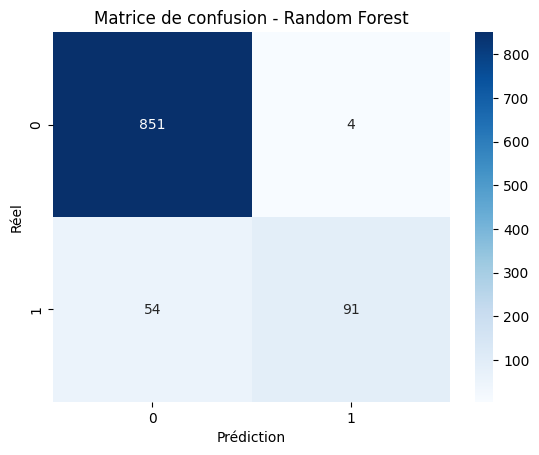

In [39]:
cm = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Random Forest")
plt.show()


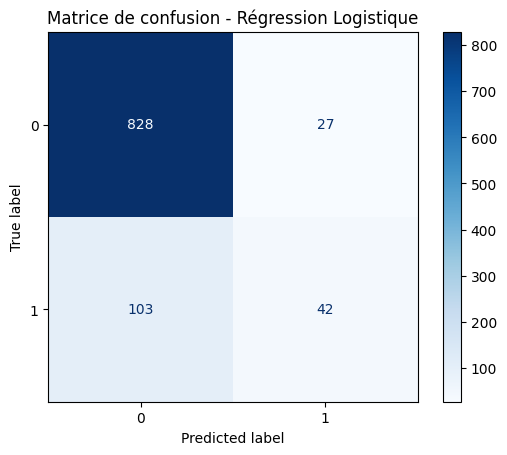

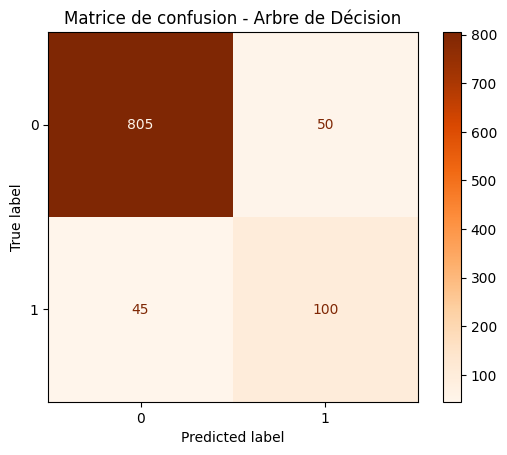

Accuracy Logistic Regression: 0.87
Classification report Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       855
           1       0.61      0.29      0.39       145

    accuracy                           0.87      1000
   macro avg       0.75      0.63      0.66      1000
weighted avg       0.85      0.87      0.85      1000

Accuracy Decision Tree: 0.905
Classification report Decision Tree:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       855
           1       0.67      0.69      0.68       145

    accuracy                           0.91      1000
   macro avg       0.81      0.82      0.81      1000
weighted avg       0.91      0.91      0.91      1000



In [46]:
# Standardisation
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# Modèle 1 : Régression Logistique
# ----------------------------
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# ----------------------------
# Modèle 2 : Arbre de Décision
# ----------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# ----------------------------
# Matrices de confusion
# ----------------------------
# Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(cm_logreg, display_labels=[0,1])
disp_logreg.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Régression Logistique")
plt.show()

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(cm_dt, display_labels=[0,1])
disp_dt.plot(cmap=plt.cm.Oranges)
plt.title("Matrice de confusion - Arbre de Décision")
plt.show()

# ----------------------------
# Évaluation
# ----------------------------
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_logreg))
print("Classification report Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Classification report Decision Tree:\n", classification_report(y_test, y_pred_dt))

#### Importance des features

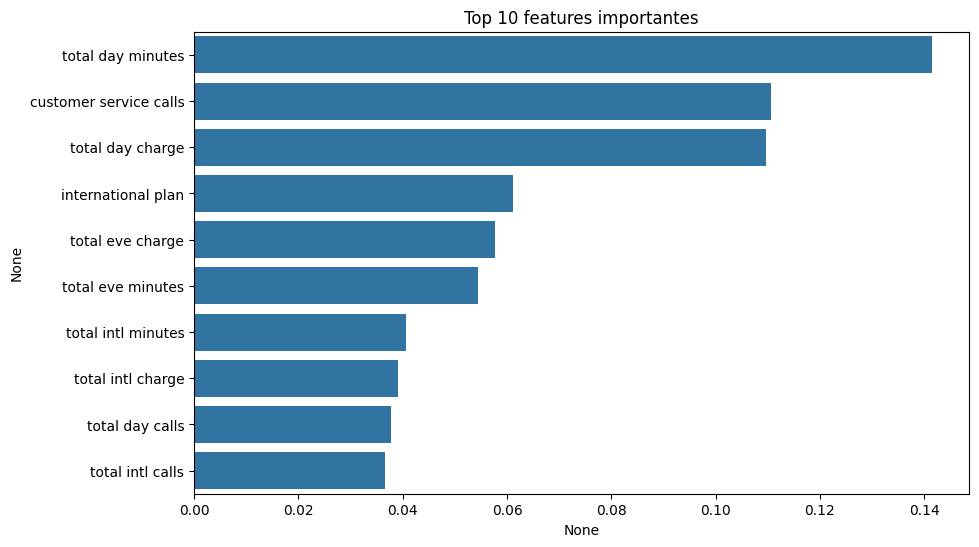

In [42]:
# Supposons que X soit votre DataFrame initial (avant split)
X_orig = X.copy()  # garder les noms de colonnes

# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Recréer un DataFrame avec les colonnes
X_train_df = pd.DataFrame(X_train_scaled, columns=X_orig.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_orig.columns)

# Calcul des importances avec Random Forest
importances = pd.Series(rf.feature_importances_, index=X_train_df.columns).sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 features importantes")
plt.show()


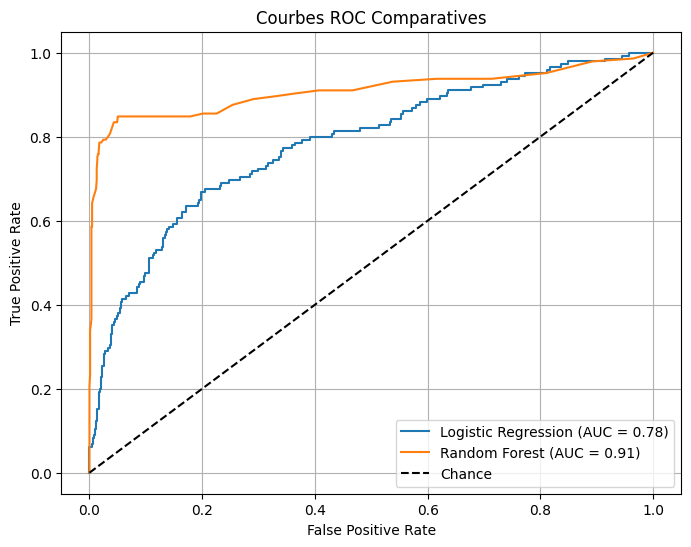

In [44]:
# ----------------------------
# Imports nécessaires
# ----------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ----------------------------
# Prédictions probabilistes
# ----------------------------
# Utiliser les arrays NumPy standardisés pour éviter les warnings
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# ----------------------------
# Calcul des courbes ROC
# ----------------------------
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_logreg = roc_auc_score(y_test, y_prob_logreg)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# ----------------------------
# Affichage des courbes ROC
# ----------------------------
plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC Comparatives')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Modèle final et comparaison

### Modèle retenu
- **Random Forest Classifier**  
- Meilleure performance (accuracy et AUC élevées)  
- Variables importantes : `customer service calls`, `total day minutes`, `international plan`  
- Avantages : capture les relations non-linéaires, stable, identifie les features clés  

### Comparaison des modèles

| Modèle               | Accuracy | AUC  | Points forts                  |
|----------------------|---------|------|-------------------------------|
| Régression Logistique | à compléter | à compléter | Simple, interprétable        |
| Arbre de Décision     | à compléter | à compléter | Capture non-linéarités       |
| Random Forest (final) | à compléter | à compléter | Stable, performant, features importantes |

### Conclusion
Le modèle final permet de prédire efficacement le churn et d’orienter les actions de fidélisation.
